#### simple linear regression
Model function: $$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$ where $w$ is the weight and $b$ is the bias. 

Model parameters: $$ \theta = \{w, b\} \tag{2}$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# dummy data 
x_train = np.array([1.0, 2.0]) # in 1000 sq ft of house area
y_train = np.array([300.0, 500.0]) # in 1000 rupees of house price

m = x_train.shape[0] # number of training examples, alternatively use len(x_train)

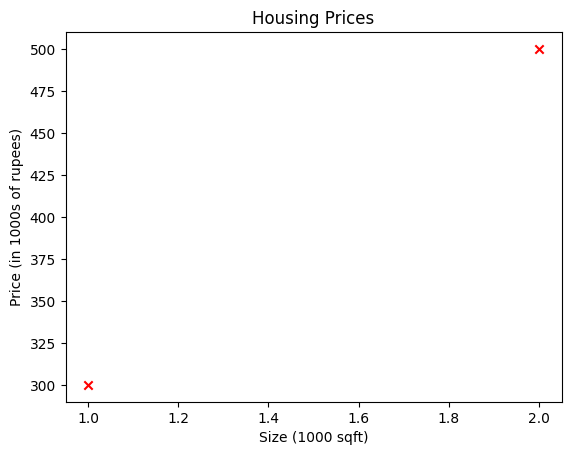

In [4]:
# plot training examples
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of rupees)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

In [23]:
def model_output(x, w, b):
  """computes the prediction of a linear model

  Args:
      x (ndarray(m,)): data with m examples
      w,b (scalar): model parameters

  Returns:
      yhat (ndarray(m,)): prediction of the linear model
  """
  # using loop (inefficient)
  
  # m = x.shape[0]
  # f_wb = np.zeros(m)
  # for i in range(m):
  #   f_wb[i] = w*x[i] + b
  
  # using numpy to compute f_wb (efficient)
  
  f_wb = w * x + b 
  return f_wb

In [24]:
# initialize model parameters
w = 100
b = 200

In [25]:
yhat = model_output(x_train, w, b)
print(yhat)

[300. 400.]


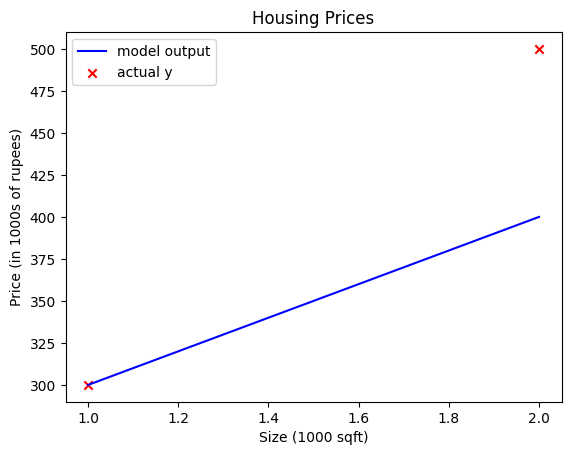

In [8]:
# plot actual y and model output
plt.plot(x_train, yhat, c='b', label='model output')
plt.scatter(x_train, y_train, marker='x', c='r', label='actual y')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of rupees)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

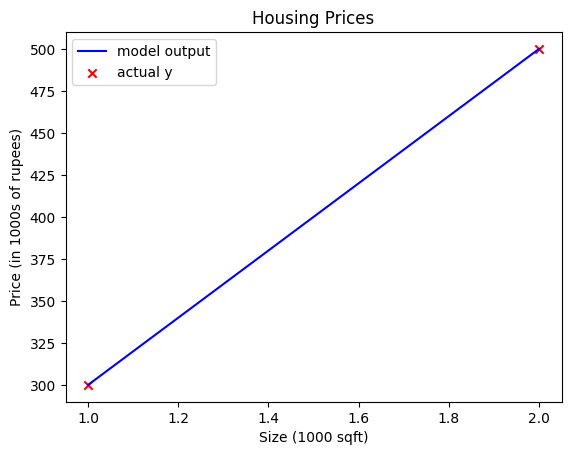

In [9]:
# try with different parameters
w = 200
b = 100
yhat = model_output(x_train, w, b)
plt.plot(x_train, yhat, c='b', label='model output')
plt.scatter(x_train, y_train, marker='x', c='r', label='actual y')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of rupees)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

best fit!

In [11]:
# prediction for a new data 
x_i = np.array([1.4])
cost = model_output(x_i, w, b)
print(cost)

[380.]


But, how would we find out the optimal values for the model parameters? Well, for that reason, we need to evaluate how good or bad is our
current model output and based on that we would update the model parameters.
So, let's write down the cost function for linear regression.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  

In [18]:
def compute_cost(x, y, w, b):
  """computes the cost function for linear regression

  Args:
      x (ndarray (m,)): data with m examples
      y (ndarray (m,)): target/actual values
      w,b (scalar): model parameters

  Returns:
      total_cost (scalar): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
  """
  y_hat = model_output(x,w,b)
  total_cost = 0
  total_cost = np.sum(np.square(y_hat-y))
  total_cost /= (2 * len(x))
  return total_cost

In [26]:
w = 100.0
b = 100.0
cost1 = compute_cost(x_train,y_train, w, b)
w = 200
b = 100
cost2 = compute_cost(x_train,y_train, w, b)
print(cost1, cost2)

12500.0 0.0


### Optimizers

How to automatically update w and b to its optimal or near optimal values?
This is where optimizers come into play. Optimizers are algorithms or methods used to change the parameters of your model such as weights and biases in order to reduce the losses.

In machine learning, we commonly use gradient descent optimization (GD) method and it's variants. GD is commonly used in deep learning models to update the weights of a neural network through backpropagation.

Some notations to be used:
- $t$ time step
- $w_t$ is the weight/parameter which we want to update where the subscript t means weight at time step t.
- $\alpha$ is the learning rate
- $\frac{\partial L}{\partial w}$ is gradient of the loss function L which we want to minimize with respect to the weight w.


Vanilla stochastic gradient descent (SGD) algorithm is a simple and very efficient approach to fit linear models. It is particularly useful when the number of samples (and the number of features) is very large. 

vanilla SGD updates weights by subtracting the current weight by a factor (learning rate) of the gradient.

$$ w_{t+1} = w_t - \alpha \frac{\partial L}{\partial w}$$

We do 3 types variations in the above equation:
1. Adapt the "gradient component" $\frac{\partial L}{\partial w}$ instead of using only single gradient like in SGD, take an aggregate of multiple gradients (specifically exponential moving average).
2. Adapt the "learning rate component" $\alpha$ Instead of keeping a constant learning rate, adapt the learning rate according to the magnitude of the gradient(s).
3. Both (1) and (2), adapt both the gradient and the learning rate.

##### Optimizer Table

The table below shows various optimizers, their year of introduction, and whether they use learning rate and/or gradients.

| Optimizer | Year | Learning Rate | Gradient |
|-----------|------|---------------|----------|
| Momentum  | 1964 |               | ✓        |
| AdaGrad   | 2011 | ✓             |          |
| RMSprop   | 2012 | ✓             |          |
| Adadelta  | 2012 | ✓             |          |
| Nesterov  | 2013 |               | ✓        |
| Adam      | 2014 | ✓             | ✓        |
| AdaMax    | 2015 | ✓             | ✓        |
| Nadam     | 2015 | ✓             | ✓        |
| AMSGrad   | 2018 | ✓             | ✓        |

Examples of optimizers:
- Stochastic Gradient Descent (SGD)
- Momentum
- AdaGrad (Adaptive Gradient algorithm)
- RMSprop (Root Mean Square Propagation)
- Adadelta (adaptive learning rate method)
- Nesterov Accelerated Gradient (NAG)
- Adam (Adaptive Moment Estimation)
- AdaMax (Adaptive Moment Estimation with infinity Norm)
- Nadam (Nesterov-accelerated Adaptive Moment Estimation)
- AMSGrad (Adaptive Moment Estimation with a gradient based maximum)

1. SGD: Stochastic Gradient Descent
$$ w_{t+1} = w_t - \alpha \frac{\partial L}{\partial w_t} $$

2. Momentum
Instead of depending only on the current gradient to update the weight, gradient descent with momentum replaces the current gradient with momentum ("m") which is an average of gradients. This aggregate is the exponential moving average of current and past gradients (up to time t). The momentum term is denoted by $\beta$.

$$ w_{t+1} = w_t - \alpha m_t $$
where,
$$ m_t = \beta m_{t-1} + (1-\beta) \frac{\partial L}{\partial w_t} $$

m is initialized to 0 and $\beta$ is a hyperparameter between 0 and 1. common default value of $\beta$ is 0.9.

3. AdaGrad: Adaptive Gradient Algorithm
AdaGrad acts on the learning rate component by dividing the learning rate by the square root of the cumulative sum of current and past squared of gradients. Note the gradient components remains unchanged like in SGD.

$$ w_{t+1} = w_t - \frac{\alpha}{\sqrt{v_t + \epsilon}} \cdot \frac{\partial L}{\partial w_t} $$

where,
$$ v_t = v_{t-1} + (\frac{\partial L}{\partial w_t})^2 $$
and $\epsilon$ is a small value to avoid division by zero.

default values in keras:
- $\alpha$ = 0.01
- $\epsilon$ = 1e-7

4. RMSprop: Root Mean Square Propagation
RMSprop (improvement to AdaGrad) is similar to AdaGrad but instead of accumulating all past squared gradients, RMSprop uses an exponential moving average of past squared gradients. The learning rate is divided by the square root of the moving average of the squared gradients.

$$ w_{t+1} = w_t - \frac{\alpha}{\sqrt{v_t + \epsilon}} \cdot \frac{\partial L}{\partial w_t} $$

where,
$$ v_t = \beta v_{t-1} + (1-\beta) (\frac{\partial L}{\partial w_t})^2 $$
and $\epsilon$ is a small value to avoid division by zero.

default values in keras:
- $\alpha$ = 0.001
- $\beta$ = 0.9
- $\epsilon$ = 1e-6

5. Adadelta: Adaptive Learning Rate Method
Like RMSprop, Adadelta is also another improvement from AdaGrad, focusing on learning rate component. Adadelta stands for adaptive delta, where delta is difference between current weight and the newly updated weight. 

The difference between Adadelta and RMSprop is that Adadelta removes the use of the learning rate component completely by replacing it with D, the exponential moving average of squared deltas.

$$ w_{t+1} = w_t - \frac{\sqrt{D_{t-1} + \epsilon}}{\sqrt{v_t + \epsilon}} \cdot \frac{\partial L}{\partial w_t} $$

where,
$$ D_t = \beta D_{t-1} + (1-\beta) [\triangle w_t]^2 $$

$$ v_t = \beta v_{t-1} + (1- \beta) [\frac{\partial L}{\partial w_t}]^2$$
with D and v initialized to 0 and 

$$ \triangle w_t = w_t - w_{t-1} $$

Default values from keras:
- $\beta$ = 0.95
- $\epsilon$ = 1e-6

6. Nesterov Accelerated Gradient (NAG)

Nesterov Accelerated Gradient (NAG) is an improved version of momentum-based gradient descent that helps prevent overshooting and improves convergence speed. Instead of computing the gradient at the current position, NAG looks ahead by applying momentum first and then computing the gradient. This helps in anticipating the direction, leading to smoother and more accurate updates.

Mathematical Update Rule:

Compute the look-ahead position:
$$ v_{t+1} = \gamma v_t - \alpha \nabla f(w_t + \beta v_t) $$

Update weights using the new velocity:
$$ w_{t+1} = w_t + v_{t+1} $$

Where:
- $ \nabla f(w_t + \beta v_t)$ = gradient at the lookahead position

---

Why NAG is Better than Momentum?
- **Momentum method** moves based on past gradients but may overshoot.  
- **NAG corrects overshooting** by computing gradients at the **future position**, leading to a more stable and adaptive update.  
- Works well in **non-convex** optimization problems.  

---

Use Case:
- Often used in deep learning for **faster convergence**, especially when dealing with **high-dimensional loss surfaces**.

7. Adam (Adaptive Moment Estimation) Optimizer

Adam combines ideas from **Momentum** and **AdaGrad** to provide an **adaptive learning rate** while maintaining the benefits of momentum. It computes **both** first-moment (mean) and second-moment (uncentered variance) estimates of the gradients.

Intuition Behind Adam:
- **Momentum** helps smooth out updates by accumulating past gradients, preventing erratic updates.  
- **AdaGrad** adapts the learning rate for each parameter based on the historical gradient magnitudes, improving performance for sparse data.  
- **Adam combines both**: It maintains moving averages of both gradients and squared gradients, normalizing updates based on past behavior.  

Thus, Adam can efficiently handle **sparse gradients**, **non-stationary objectives**, and **high-dimensional loss surfaces**—making it well-suited for **deep learning**.

---

Mathematical Update Rule:

1. Compute biased moment estimates:
- **First moment estimate (mean of gradients):**  
  $$
  m_{t+1} = \beta_1 m_t + (1 - \beta_1) \nabla f(w_t)
  $$
- **Second moment estimate (uncentered variance of gradients):**  
  $$
  v_{t+1} = \beta_2 v_t + (1 - \beta_2) [\nabla f(w_t)]^2
  $$

2. Bias correction (to adjust for initialization bias):
- **Corrected first moment estimate:**  
  $$
  \hat{m}_{t+1} = \frac{m_{t+1}}{1 - \beta_1^{t+1}}
  $$
- **Corrected second moment estimate:**  
  $$
  \hat{v}_{t+1} = \frac{v_{t+1}}{1 - \beta_2^{t+1}}
  $$

3. Parameter update:
  $$ w_{t+1} = w_t - \frac{\alpha}{\sqrt{\hat{v}_{t+1}} + \epsilon} \cdot \hat{m}_{t+1}
  $$

---

**Where:**
- $w_t$ = current weights  
- $ \nabla f(w_t)$ = gradient of the loss function  
- $ m_t $ = first moment estimate (exponential moving average of gradients)  
- $ v_t $ = second moment estimate (exponential moving average of squared gradients)  
- $ \beta_1 $ = decay rate for first moment (default **0.9**)  
- $ \beta_2 $ = decay rate for second moment (default **0.999**)  
- $ \alpha $ = learning rate  
- $ \epsilon $ = small value to prevent division by zero (default **1e-8**)  

---

**Why Adam is Better?**

**Combines Momentum and Adaptive Learning Rates** → Faster convergence  
**Bias Correction for Stability** → Adjusts initial values to prevent bias  
**Works Well for Sparse Data** → Adapts learning rate per parameter  
**Handles Non-Stationary Objectives** → Good for deep learning  

---

**Use Case:**
Adam is widely used in **deep learning** and **neural networks** due to its adaptability, efficiency, and ability to handle noisy gradients.

---

8. AdaMax Optimizer

Adamax is an adaptation of the Adam optimizer that replaces the L2 norm with the L-infinity norm. This modification helps stabilize the learning rate and improve convergence, especially in deep learning models. m is the exponential moving average of gradients, and v is the exponential moving average of past p-norm of gradients, approximated to the max function as below.

$$ w_{t+1} = w_t - \frac{\alpha}{v_t} \cdot \hat{m}_t $$

where,
$$ \hat{m}_t = \frac{m_t}{1-\beta_1^t} $$ 
is bias correction for m and 

$$m_t = \beta_1 m_{t-1} + (1-\beta_1) \frac{\partial L}{\partial w_t}$$
$$ v_t = max(\beta_2 v_{t-1}, | \frac{\partial L}{\partial w_t} |) $$

with m and v initialized to 0.
proposed default values:
- $\beta_1$ = 0.9
- $\beta_2$ = 0.999
- $\alpha$ = 0.002

9. Nadam Optimizer
Nadam is an improved version of Adam that includes Nesterov momentum and introduces a momentum term to the gradient. 

The update rule for adam can also be written as follows:
$$ w_{t+1} = w_t - \frac{\alpha}{\sqrt{\hat{v}_t} + \epsilon} \cdot (\beta_1 \hat{m}_{t-1} + \frac{1-\beta_1}{1-\hat{\beta}_1} \cdot \frac{\partial L}{\partial w_t}) $$

Nadam uses Nesterov to update the gradient one step ahead by replacing the previous $\hat{m}$ in the above equation to the current $\hat{m}$.

$$ w_{t+1} = w_t - \frac{\alpha}{\sqrt{\hat{v}_t} + \epsilon} \cdot (\beta_1 \hat{m}_{t} + \frac{1-\beta_1}{1-\hat{\beta}_1} \cdot \frac{\partial L}{\partial w_t}) $$

where,
$$ \hat{m}_t = \frac{\beta_1 m_t}{1-\hat{\beta}_1} $$
$$ \hat{v}_t = \frac{v_t}{1-\hat{\beta}_2} $$

and 

$$m_t = \beta_1 m_{t-1} + (1-\beta_1) \frac{\partial L}{\partial w_t}$$
$$ v_t = \beta_2 v_{t-1} + (1-\beta_2) (\frac{\partial L}{\partial w_t})^2 $$
with m and v initialized to 0.
proposed default values:
- $\beta_1$ = 0.9
- $\beta_2$ = 0.999
- $\alpha$ = 0.002
- $\epsilon$ = 1e-7

10. AMSGrad 
Another variant of Adam is the AMSGrad. this variant revisits the adaptive learning rate component in Adam and changes it to ensure that the current v is always larger than the v from the previous time step.

$$w_{t+1} = w_t - \frac{\alpha}{\sqrt{\hat{v}_t}+\epsilon} \cdot m_t $$

where, 
$$ \hat{v}_t = max(\hat{v}_{t-1}, v_t) $$

and 

$$m_t = \beta_1 m_{t-1} + (1-\beta_1) \frac{\partial L}{\partial w_t}$$
$$ v_t = \beta_2 v_{t-1} + (1-\beta_2) (\frac{\partial L}{\partial w_t})^2 $$
with m and v initialized to 0.
proposed default values:
- $\beta_1$ = 0.9
- $\beta_2$ = 0.999
- $\alpha$ = 0.001
- $\epsilon$ = 1e-7